In [2]:
import cv2
from matplotlib import pyplot as plt
print("input a picture of either .jpg or .png format")

input a picture of either .jpg or .png format


In [3]:
img = cv2.imread(r'C:\Users\vivin\OneDrive\Pictures\Screenshots\Screenshot 2025-03-21 150305.png')


In [4]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [5]:
img

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [6]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("inverted.jpg", inverted_image)

True

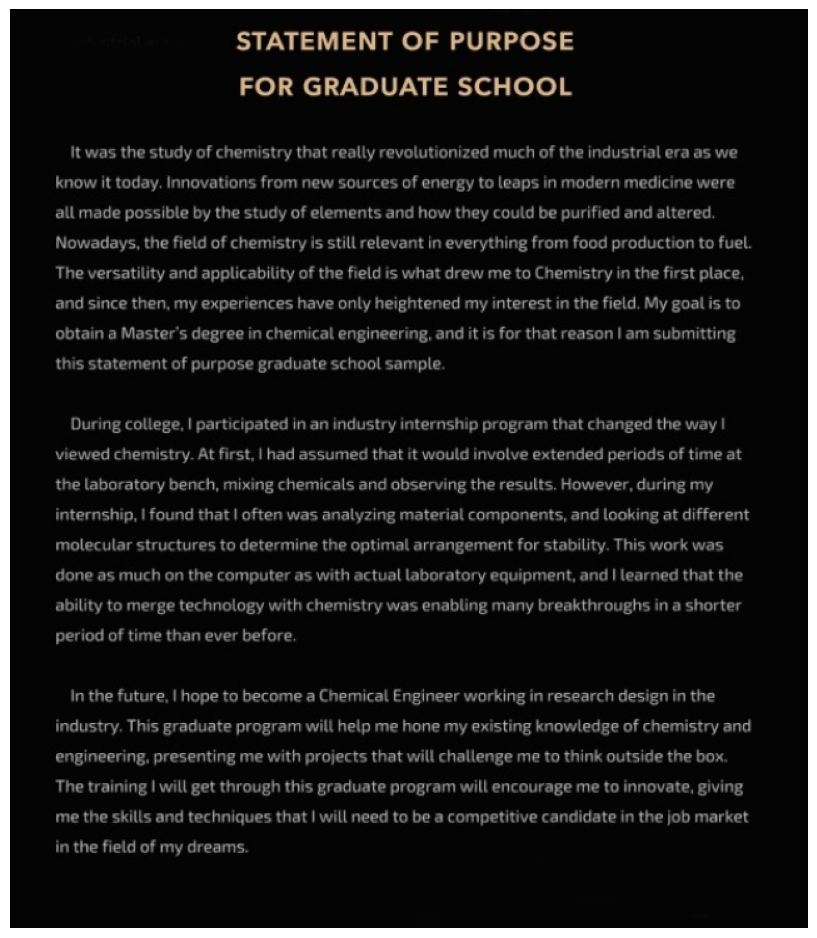

In [7]:
display("inverted.jpg")

In [8]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
gray_image = grayscale(img)
cv2.imwrite("gray.jpg", gray_image)

True

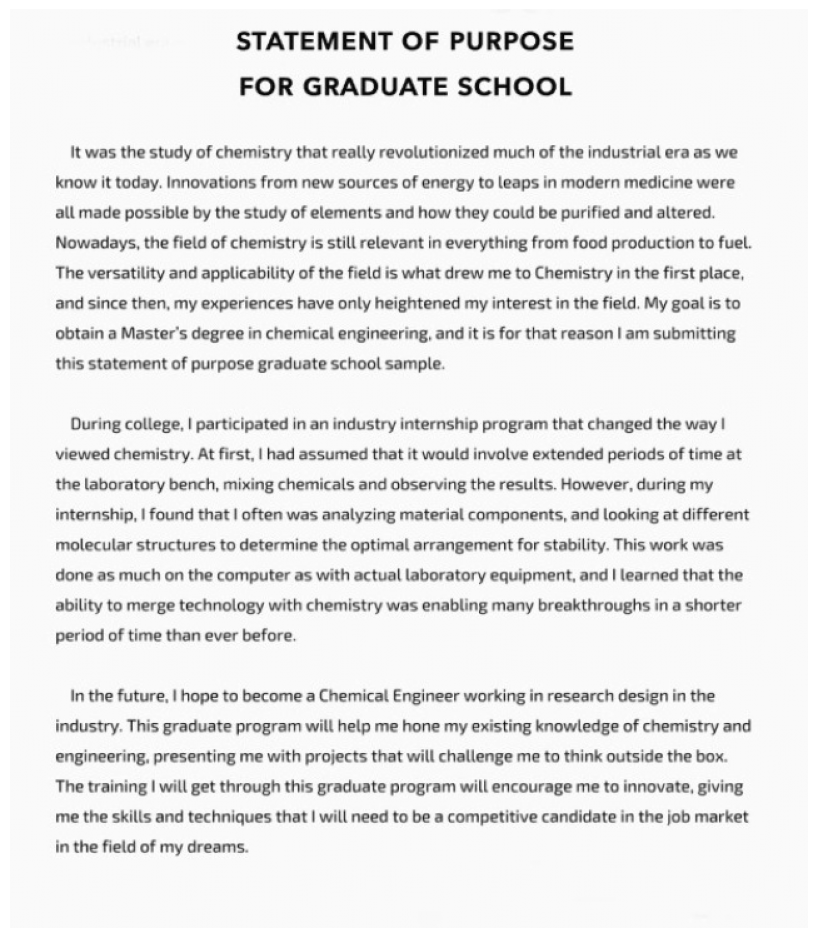

In [10]:
display("gray.jpg")

In [11]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("bw_image.jpg", im_bw)
#blackwhite

True

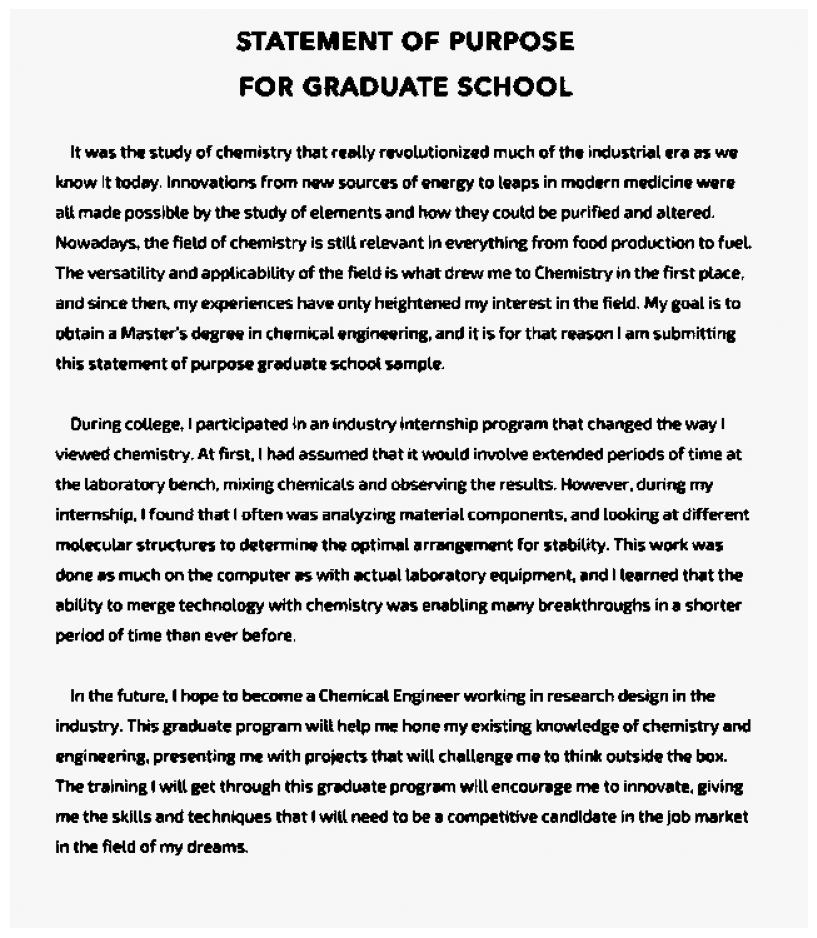

In [12]:
display("bw_image.jpg")

In [13]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [14]:
no_noise = noise_removal(im_bw)
cv2.imwrite("no_noise.jpg", no_noise)

True

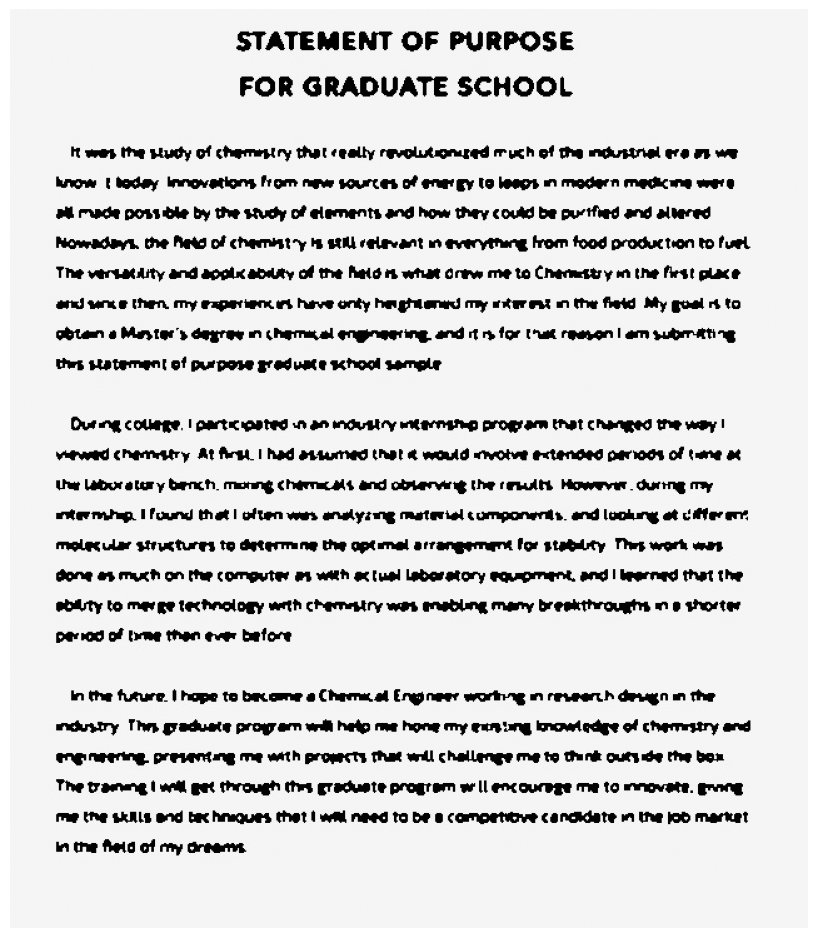

In [15]:
display("no_noise.jpg")


In [16]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

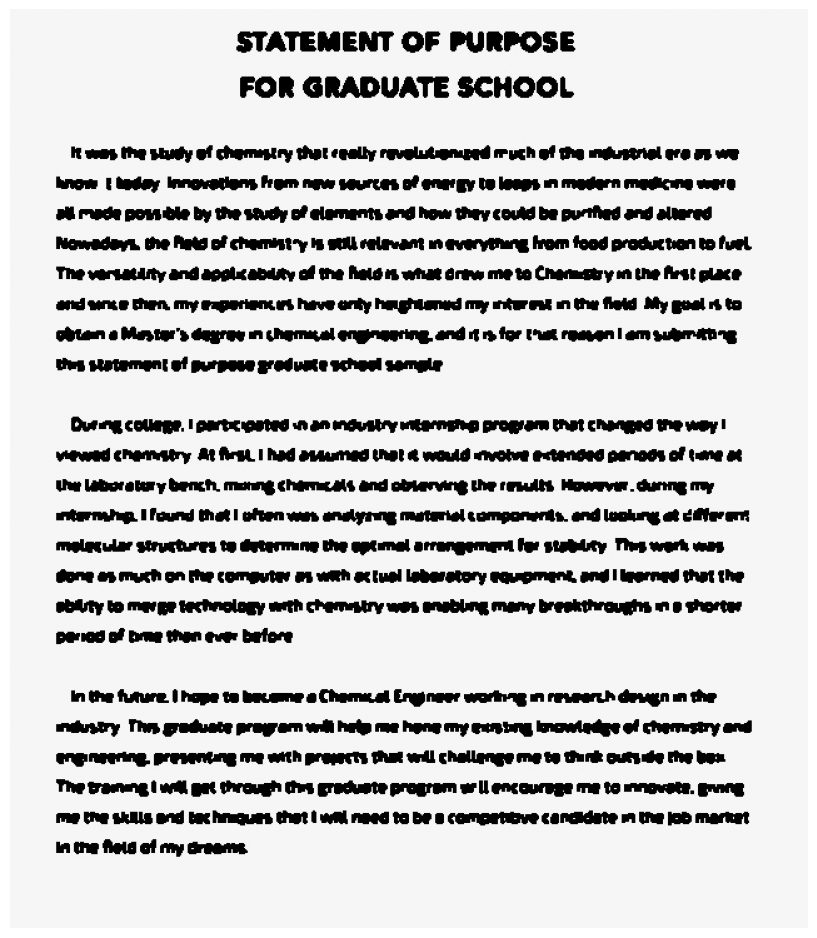

In [17]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg", dilated_image)
display("dilated_image.jpg")

In [18]:
!pip install pytesseract


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import pytesseract
from PIL import Image

In [20]:
img = Image.open("inverted.jpg")
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
ocr_result = pytesseract.image_to_string(img)


In [21]:
if len(ocr_result) == 0:
    print("non recognisable")
else:
    print(ocr_result)

STATEMENT OF PURPOSE
FOR GRADUATE SCHOOL

Itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. Innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
Nowadays, the field of chemistry is still relevant in everything from food production to fuel.
‘The versatility and applicability of the field is what drew me to Chemistry in the first place,
and since then, my experiences have only heightened my interest in the field, My goal is to

obtain a Master's degree in chemical engineering, and it is for that reason | am submitting

this statement of purpose graduate school sample.

During college, | participated in an industry internship program that changed the way |
viewed chemistry. At first, | had assumed that it would involve extended periods of time at
the laboratory bench, mixing chemicals and observing the results. However, during my
i

Text preprocessing


In [22]:
df=ocr_result
df = df.lower()
print(df)

statement of purpose
for graduate school

itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays, the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place,
and since then, my experiences have only heightened my interest in the field, my goal is to

obtain a master's degree in chemical engineering, and it is for that reason | am submitting

this statement of purpose graduate school sample.

during college, | participated in an industry internship program that changed the way |
viewed chemistry. at first, | had assumed that it would involve extended periods of time at
the laboratory bench, mixing chemicals and observing the results. however, during my
i

In [23]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

df = remove_html_tags(df)
print(df)

statement of purpose
for graduate school

itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays, the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place,
and since then, my experiences have only heightened my interest in the field, my goal is to

obtain a master's degree in chemical engineering, and it is for that reason | am submitting

this statement of purpose graduate school sample.

during college, | participated in an industry internship program that changed the way |
viewed chemistry. at first, | had assumed that it would involve extended periods of time at
the laboratory bench, mixing chemicals and observing the results. however, during my
i

In [24]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

df= remove_url(df)
print(df)

statement of purpose
for graduate school

itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays, the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place,
and since then, my experiences have only heightened my interest in the field, my goal is to

obtain a master's degree in chemical engineering, and it is for that reason | am submitting

this statement of purpose graduate school sample.

during college, | participated in an industry internship program that changed the way |
viewed chemistry. at first, | had assumed that it would involve extended periods of time at
the laboratory bench, mixing chemicals and observing the results. however, during my
i

In [25]:
import string

def remove_punc(text):
    punc = string.punctuation.replace('.', '')
    return text.translate(str.maketrans('', '', punc))


df = remove_punc(df)
print(df)

statement of purpose
for graduate school

itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place
and since then my experiences have only heightened my interest in the field my goal is to

obtain a masters degree in chemical engineering and it is for that reason  am submitting

this statement of purpose graduate school sample.

during college  participated in an industry internship program that changed the way 
viewed chemistry. at first  had assumed that it would involve extended periods of time at
the laboratory bench mixing chemicals and observing the results. however during my
internship  fou

In [26]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [27]:
def chat_conversion(text):
    new_lines = []
    for line in text.splitlines():
        new_line = []
        for word in line.split():
            if word.upper() in chat_words:
                new_line.append(chat_words[word.upper()])
            else:
                new_line.append(word)
        new_lines.append(" ".join(new_line))
    return "\n".join(new_lines)


df = chat_conversion(df)
print(df)

chat_conversion("IRL")

statement of purpose
for graduate school

itwas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place
and since then my experiences have only heightened my interest in the field my goal is to

obtain a masters degree in chemical engineering and it is for that reason am submitting

this statement of purpose graduate school sample.

during college participated in an industry internship program that changed the way
viewed chemistry. at first had assumed that it would involve extended periods of Tears in my eyes at
the laboratory bench mixing chemicals and observing the results. however during my
interns

'In Real Life'

In [28]:
%pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from textblob import TextBlob
def spell_check(text):
    for word in text:
        TextBlob(word).correct()
corrected_df = TextBlob(df).correct()
print(corrected_df)

statement of purpose
for graduate school

twas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place
and since then my experiences have only heightened my interest in the field my goal is to

obtain a masters degree in chemical engineering and it is for that reason am submitting

this statement of purpose graduate school sample.

during college participated in an industry internship program that changed the way
viewed chemistry. at first had assumed that it would involve extended periods of Years in my eyes at
the laboratory bench mixing chemicals and observing the results. however during my
internsh

In [30]:
%pip install emoji

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [31]:
import emoji
print(emoji.demojize("Python is 🔥"))
corrected_df = emoji.demojize(corrected_df)
print(corrected_df)

Python is :fire:
statement of purpose
for graduate school

twas the study of chemistry that really revolutionized much of the industrial era as we
know it today. innovations from new sources of energy to leaps in modern medicine were
all made possible by the study of elements and how they could be purified and altered.
nowadays the field of chemistry is still relevant in everything from food production to fuel.
‘the versatility and applicability of the field is what drew me to chemistry in the first place
and since then my experiences have only heightened my interest in the field my goal is to

obtain a masters degree in chemical engineering and it is for that reason am submitting

this statement of purpose graduate school sample.

during college participated in an industry internship program that changed the way
viewed chemistry. at first had assumed that it would involve extended periods of Years in my eyes at
the laboratory bench mixing chemicals and observing the results. however d

In [32]:
%pip install pickle5

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running bdist_wheel
      running build
      running build_py
      Generating grammar tables from c:\Program Files\Python310\lib\lib2to3\Grammar.txt
      Writing grammar tables to c:\Program Files\Python310\lib\lib2to3\Grammar3.10.0.final.0.pickle
      Writing failed: [Errno 13] Permission denied: 'c:\\Program Files\\Python310\\lib\\lib2to3\\Grammar3.10.0.final.0.pickle'
      Generating grammar tables from c:\Program Files\Python310\lib\lib2to3\PatternGrammar.txt
      Writing grammar tables to c:\Program Files\Python310\lib\lib2to3\PatternGrammar3.10.0.final.0.pickle
      Writing failed: [Errno 13] Permission denied: 'c:\\Program Files\\Python310\\lib\\lib2to3\\PatternGrammar3.10.0.final.0.pickle'
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\pickle5
      copying pickle5\pickle

In [33]:
import pickle
tokenized_stores = {'en_train': [], 'en_dev': [], 'en_test': [], 'hi_train': [], 'hi_dev': [], 'hi_test': []}

In [34]:
for key in tokenized_stores:
    file_name = str(key)[3:] + "." + str(key)[0:2]
    load = open(file_name, encoding='utf-8')

    sentences = load.read().split('\n')
    
    for sentence in sentences:
        token_store = sentence.split(' ')
        tokenized_stores[key].append(token_store)

In [35]:
print(tokenized_stores['hi_train'][2])
train_size = len(tokenized_stores['en_train'])
dev_size = len(tokenized_stores['en_dev'])
test_size = len(tokenized_stores['en_test'])

['ऑपरेशन', 'के', 'दौरान', 'लैन्स', 'प्रत्यारोपण', 'आँख', 'के', 'अगले', 'भाग', ',', 'आइरिस', 'के', 'आगे', 'किया', 'जाता', 'है', '।']


In [36]:
en_words = {}
hi_words = {}

for key in tokenized_stores:
    if str(key)[0] == 'e':
        # creating en_words
        for sentence in tokenized_stores[key]:
            for word in sentence:
                if word in en_words:
                    en_words[word] += 1
                else:
                    en_words[word] = 1
    else:
        # creating hi_words
        for sentence in tokenized_stores[key]:
            for word in sentence:
                if word in hi_words:
                    hi_words[word] += 1
                else:
                    hi_words[word] = 1
                    
en_vocab = len(en_words)
hi_vocab = len(hi_words)
print("Number of Unique Words:")
print("> English:", str(en_vocab))
print("> Hindi:", str(hi_vocab))

Number of Unique Words:
> English: 36879
> Hindi: 43921


In [37]:
t = {}
# usage: t[('EN_word', 'HI_word')] = probability of EN_Word given HI_word
uniform = 1 / (en_vocab * hi_vocab)

In [38]:
n_iters = 0
max_iters = 25

fine_tune = 1
has_converged = False

while n_iters < max_iters and has_converged == False:
    has_converged = True
    max_change = -1

    n_iters += 1
    count = {}
    total = {}
    for index in range(train_size):
        s_total = {}
        for en_word in tokenized_stores['en_train'][index]:
            s_total[en_word] = 0
            for hi_word in tokenized_stores['hi_train'][index]:
                if (en_word, hi_word) not in t:
                    t[(en_word, hi_word)] = uniform
                s_total[en_word] += t[(en_word, hi_word)]

        for en_word in tokenized_stores['en_train'][index]:
            for hi_word in tokenized_stores['hi_train'][index]:
                if (en_word, hi_word) not in count:
                    count[(en_word, hi_word)] = 0
                count[(en_word, hi_word)] += (t[(en_word, hi_word)] / s_total[en_word])

                if hi_word not in total:
                    total[hi_word] = 0
                total[hi_word] += (t[(en_word, hi_word)] / s_total[en_word])

    # estimating the probabilities

    if fine_tune == 0:
      updated = {}
      # train for all valid word pairs s.t count(en_word, hi_word) > 0
      for index in range(train_size):
          for hi_word in tokenized_stores['hi_train'][index]:
              for en_word in tokenized_stores['en_train'][index]:
                  if (en_word, hi_word) in updated:
                      continue
                  updated[(en_word, hi_word)] = 1
                  if abs(t[(en_word, hi_word)] - count[(en_word, hi_word)] / total[hi_word]) > 0.01:
                      has_converged = False
                      max_change = max(max_change, abs(t[(en_word, hi_word)] - count[(en_word, hi_word)] / total[hi_word]))
                  t[(en_word, hi_word)] = count[(en_word, hi_word)] / total[hi_word]

    elif fine_tune == 1:
      # train it only for 1000 most frequent words in English and Hindi
      max_words = 1000
      n_hi_words = 0
      updates = 0

      for hi_word_tuples in sorted(hi_words.items(), key = lambda k:(k[1], k[0]), reverse = True):
          hi_word = hi_word_tuples[0]
          n_hi_words += 1
          if n_hi_words > max_words:
              break
          n_en_words = 0
          for en_word_tuples in sorted(en_words.items(), key = lambda k:(k[1], k[0]), reverse = True):
              en_word = en_word_tuples[0]
              n_en_words += 1
              if n_en_words > max_words:
                  break
              if (en_word, hi_word) not in count or hi_word not in total:
                  continue
                  # assume in this case: t[(en_word, hi_word)] = uniform
              else:
                  if abs(t[(en_word, hi_word)] - count[(en_word, hi_word)] / total[hi_word]) > 0.005:
                      has_converged = False
                      max_change = max(max_change, abs(t[(en_word, hi_word)] - count[(en_word, hi_word)] / total[hi_word]))
                  t[(en_word, hi_word)] = count[(en_word, hi_word)] / total[hi_word]

    print("Iteration " + str(n_iters) + " Completed, Maximum Change: " + str(max_change))

Iteration 1 Completed, Maximum Change: 0.12702983945877983
Iteration 2 Completed, Maximum Change: 0.37839562630629314
Iteration 3 Completed, Maximum Change: 0.217407035860872
Iteration 4 Completed, Maximum Change: 0.13005997455980178
Iteration 5 Completed, Maximum Change: 0.08057651269471866
Iteration 6 Completed, Maximum Change: 0.04856997020110787
Iteration 7 Completed, Maximum Change: 0.03555362770400777
Iteration 8 Completed, Maximum Change: 0.029406614861381575
Iteration 9 Completed, Maximum Change: 0.02457095418019195
Iteration 10 Completed, Maximum Change: 0.020788408537065484
Iteration 11 Completed, Maximum Change: 0.018719192726659395
Iteration 12 Completed, Maximum Change: 0.01647236630228205
Iteration 13 Completed, Maximum Change: 0.014208922903773125
Iteration 14 Completed, Maximum Change: 0.012183247164818
Iteration 15 Completed, Maximum Change: 0.01070533230776105
Iteration 16 Completed, Maximum Change: 0.009634828804602424
Iteration 17 Completed, Maximum Change: 0.008727

In [39]:
limit = 40
for element in sorted(t.items(), key = lambda k:(k[1], k[0]), reverse = True):
  print(element)
  limit -= 1
  if limit <= 0:
    break

(('or', 'या'), 0.7428089454650831)
(('and', 'तथा'), 0.7336960929966874)
(('and', 'और'), 0.7189563724564298)
(('and', 'एवं'), 0.7183124504420993)
(('and', 'व'), 0.7170500220588348)
((',', ','), 0.6962109618976713)
(('oil', 'तेल'), 0.6884574558949705)
(('30', '30'), 0.6773895694061998)
(('body', 'शरीर'), 0.6755868397968229)
(('Shimla', 'शिमला'), 0.6750139366454307)
(('water', 'पानी'), 0.6602254786077301)
(('chest', 'छाती'), 0.6591551695558174)
(('Delhi', 'दिल्ली'), 0.6563478755134947)
(('12', '12'), 0.6516055421315546)
(('skin', 'त्वचा'), 0.6493576943448509)
(('this', 'इस'), 0.6492213540524291)
(('20', '20'), 0.6399123466762006)
(('children', 'बच्चों'), 0.6399055603891741)
(('people', 'लोगों'), 0.6384099457254119)
(('milk', 'दूध'), 0.6271768274872059)
(('heart', 'हृदय'), 0.6271654259958892)
(('fever', 'बुखार'), 0.6269890380285558)
(('other', 'अन्य'), 0.6256219920564763)
(('stomach', 'पेट'), 0.6170447717986453)
(('disease', 'बीमारी'), 0.6152551231622909)
(('patients', 'रोगियों'), 0.610676

In [40]:
# file = open("translation_model.pkl","wb")
# pickle.dump(t, file)
# file.close()
model_name = "translation_model.pkl"
pickle_in = open(model_name,"rb")
t = pickle.load(pickle_in)

In [41]:
I = {}
for index in range(train_size):
    for en_id in range(len(tokenized_stores['en_train'][index])):
        length = len(tokenized_stores['en_train'][index])
        if length not in I:
            I[length] = {} # maps the positional difference to a tuple: (sum of t's, count)
        for hi_id in range(len(tokenized_stores['hi_train'][index])):
            if (hi_id - en_id) not in I[length]:
                I[length][(hi_id - en_id)] = [t[(tokenized_stores['en_train'][index][en_id], tokenized_stores['hi_train'][index][hi_id])], 1]
            else:
                I[length][(hi_id - en_id)][0] += t[(tokenized_stores['en_train'][index][en_id], tokenized_stores['hi_train'][index][hi_id])]
                I[length][(hi_id - en_id)][1] += 1

In [42]:
sentence_lengths = []
for key in I.keys():
    if key not in sentence_lengths:
        sentence_lengths.append(key)
sentence_lengths.sort()
print(sentence_lengths)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 80, 83, 93, 96, 100, 107]


In [43]:
p = {}
for key in I.keys():
    p[key] = {}
    sum_val = 0
    for diff in I[key].keys():
        p[key][diff] = I[key][diff][0] / I[key][diff][1]
        sum_val += p[key][diff]
    for diff in p[key].keys():
        p[key][diff] /= sum_val

In [44]:
for index in range(train_size):
    length_en = len(tokenized_stores['en_train'][index])
    length_hi = len(tokenized_stores['hi_train'][index])
    if length_hi - length_en > 10 and length_en == 1:
        print("Length of English Sentence:", str(length_en))
        print("Length of Hindi Sentence:", str(length_hi))

Length of English Sentence: 1
Length of Hindi Sentence: 19


In [45]:
init = {}
for length in p:
    max_prob = -1
    max_jump = 0
    for key in p[length].keys():
        if p[length][key] > max_prob:
            max_prob = p[length][key]
            max_jump = key
    init[length] = max_jump

In [46]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
bigrams = {}
unigrams = {}

# training on the train_set
def model(dataset_size, dataset_name):
    global bigrams
    global unigrams
    for index in range(dataset_size):
        token_A = ''
        for hi_token in tokenized_stores[dataset_name][index]:
            if hi_token not in unigrams:
                unigrams[hi_token] = 1
            else:
                unigrams[hi_token] += 1
            
            token_B = hi_token
            if (token_A, token_B) not in bigrams:
                bigrams[(token_A, token_B)] = 1
            else:
                bigrams[(token_A, token_B)] += 1
            token_A = token_B

model(train_size, 'hi_train')
model(dev_size, 'hi_dev')

bigram_count = len(bigrams)
unigram_count = len(unigrams)
print("Number of Unique Bigrams:", bigram_count)
print("Number of Unique Unigrams:", unigram_count)

Number of Unique Bigrams: 317170
Number of Unique Unigrams: 43851


In [48]:
from itertools import permutations
import nltk

computed_sentences = []
total_BLEU = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 0}
null_BLEU_count = 0

sorted_t = sorted(t.items(), key = lambda k:(k[1], k[0]), reverse = True)

def find_translation(en_token):
    for element in sorted_t:
        if element[0][0].lower() == en_token:
            return element[0][1]
    return ""

def get_prob(seq):
    # bigram language model with laplace smoothing and backoff
    if len(seq) < 2:
        return 1
    score = 0
    token_A = ''
    for hi_token in seq:
        token_B = hi_token
        if (token_A, token_B) not in bigrams:
            if token_B not in unigrams:
                continue
            else:
                score += unigrams[token_B] / unigram_count
        else:
            base_token_count = 0
            if token_A in unigrams:
                base_token_count = unigrams[token_A]
            score += (bigrams[(token_A, token_B)] + 1) / (base_token_count + unigram_count)
        token_A = token_B
    return score

count = 0
for index in range(test_size):
    if len(tokenized_stores['en_test'][index]) > 8 or len(tokenized_stores['en_test'][index]) < 2:
        continue

    translated_words = []
    for en_token in tokenized_stores['en_test'][index]:
        translation = find_translation(en_token)
        if translation != "":
            translated_words.append(translation)

    perm = permutations(translated_words)

    best_seq = translated_words
    best_prob = -1

    for seq in perm:
        prob = get_prob(seq)
        if prob > best_prob:
            best_prob = prob
            best_seq = seq
    
    count += 1
    print("Sentence Index: ", str(count))
    print("English Sentence:", str(tokenized_stores['en_test'][index]))
    print("Reference Hindi Sentence:", str(tokenized_stores['hi_test'][index]))
    print("Translated Sentence:", str(best_seq))
     
    print()

tested = count

Sentence Index:  1
English Sentence: ['Your', 'self-confidence', 'also', 'increases', 'with', 'teeth', '.']
Reference Hindi Sentence: ['दाँतों', 'से', 'आपका', 'आत्मविश्\u200dवास', 'भी', 'बढ़ता', 'है', '।']
Translated Sentence: ('।', 'बढ़', 'साथ', 'दाँतों', '।', 'भी')

Sentence Index:  2
English Sentence: ['Bacteria', 'stay', 'between', 'our', 'gums', 'and', 'teeth', '.']
Reference Hindi Sentence: ['हमारे', 'मसूढ़ों', 'और', 'दाँतों', 'के', 'बीच', 'बैक्टीरिया', 'मौजूद', 'होते', 'हैं', '।']
Translated Sentence: ('।', 'ठहरने', 'बीच', 'हमारे', '’', 'दाँतों', 'तथा')

Sentence Index:  3
English Sentence: ['They', 'make', 'teeth', 'dirty', 'and', 'breath', 'stinky', '.']
Reference Hindi Sentence: ['ये', 'दाँतों', 'को', 'गंदा', 'और', 'साँसों', 'को', 'बदबूदार', 'बना', 'देते', 'हैं', '।']
Translated Sentence: ('बनाने', '।', 'तथा', '।', 'दाँतों', '।', 'श्\u200dवास')

Sentence Index:  4
English Sentence: ['Clean', 'your', 'teeth', 'properly', '.']
Reference Hindi Sentence: ['दाँतों', 'को', 'ठीक', 'स

In [49]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
import os

with open("data.en", "w", encoding="utf-8") as f:
    f.write(corrected_df)

In [51]:
tokenized_stores_tr = {'en_data' : []}
for key in tokenized_stores_tr:
    file_name = str(key)[3:] + "." + str(key)[0:2]
    load = open(file_name, encoding='utf-8')

    sentences = load.read().split('\n')
    
    for sentence in sentences:
        token_store = sentence.split(' ')
        tokenized_stores_tr[key].append(token_store)
print(tokenized_stores_tr['en_data'][0])

['statement', 'of', 'purpose']


In [ ]:
from itertools import permutations
import nltk

computed_sentences = []
sorted_t = sorted(t.items(), key = lambda k:(k[1], k[0]), reverse = True)
def find_translation(en_token):
    for element in sorted_t:
        if element[0][0].lower() == en_token:
            return element[0][1]
    return ""


def get_prob(seq):
    # bigram language model with laplace smoothing and backoff
    if len(seq) < 2:
        return 1
    score = 0
    token_A = ''
    for hi_token in seq:
        token_B = hi_token
        if (token_A, token_B) not in bigrams:
            if token_B not in unigrams:
                continue
            else:
                score += unigrams[token_B] / unigram_count
        else:
            base_token_count = 0
            if token_A in unigrams:
                base_token_count = unigrams[token_A]
            score += (bigrams[(token_A, token_B)] + 1) / (base_token_count + unigram_count)
        token_A = token_B
    return score

for index in range(len(tokenized_stores_tr['en_data'])):
    translated_words = []
    for en_token in tokenized_stores_tr['en_data'][index]:
        translation = find_translation(en_token)
        if translation != "":
            translated_words.append(translation)

    perm = permutations(translated_words)
    best_seq = translated_words
    best_prob = -1

    for seq in perm:
        prob = get_prob(seq)
        if prob > best_prob:
            best_prob = prob
            best_seq = seq
        
    count += 1
    print("Translated Sentence:", str(best_seq))
    print()    

Translated Sentence: ('।', 'की', '।')

Translated Sentence: ('।', 'लिए', '’')

Translated Sentence: ()

